#### Project 4

In [1]:
# uv export --no-hashes > requirements.txt
print("notebook ok")

notebook ok


In [40]:
from research_and_analyst.utils.model_loader import ModelLoader

In [41]:
model_loader = ModelLoader()

{"timestamp": "2025-10-13T13:08:43.610944Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-13T13:08:43.617896Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-13T13:08:43.623050Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-13T13:08:43.629218Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-13T13:08:43.634987Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-13T13:08:43.659923Z", "level": "info", "event": "YAML config loaded"}


In [43]:
llm = model_loader.load_llm()

{"provider": "groq", "model": "llama-3.3-70b-versatile", "timestamp": "2025-10-13T13:09:27.128837Z", "level": "info", "event": "Loading LLM"}


In [5]:
llm.invoke("Hello, how are you?")

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.097114962, 'prompt_time': 0.00213851, 'queue_time': 0.09321595, 'total_time': 0.099253472}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a9601c56-9559-4bea-8e6a-639b82f9d6c4-0', usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})

In [13]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [14]:
def human_feedback(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [15]:
def create_analyst(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [16]:
def should_continue(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [17]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [23]:
class Analyst(BaseModel):
    """_summary_
    """
    name: str = Field(..., description="Name of the analyst")
    role: str = Field(..., description="Role of the analyst in the context of the topic")
    affiliation: str = Field(..., description="Primary affiliation of the analyst")
    description: str = Field(..., description="Description of the analyst focus, concerns, and motives")

    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [24]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(..., description="Comprehensive list of analysts with their roles and affiliations.")

In [20]:
analyst = Analyst(
    name="klangat",
    role="Gen AI eng.",
    affiliation="OpenAI",
    description="Focus on building and deploying generative AI models."
)

In [21]:
analyst

Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.')

In [13]:
print(analyst.persona)

Name: klangat
Role: Gen AI eng.
Affiliation: OpenAI
Description: Focus on building and deploying generative AI models.



In [14]:
analyst.role

'Gen AI eng.'

In [15]:
analyst.affiliation

'OpenAI'

In [17]:
class GenerateAnalystsState(TypedDict):
    """_summary_
    """
    topic: str
    max_analysts: int
    human_analyst_feedback: str
    analysts: List[Analyst]

In [18]:
GenerateAnalystsState(
    topic="AI in healthcare",
    max_analysts=5,
    human_analyst_feedback="give the real information",
)

{'topic': 'AI in healthcare',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real information'}

In [19]:
analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [32]:
def create_analyst(state):
    """It is creating my analyst
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspective)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)] + [HumanMessage(content="Generate the set of analysts")])

    # write the list of analysis to state
    return{"analysts": analysts.analysts}

In [29]:
print([analyst_instructions.format(
    topic="AI in healthcare",
    max_analysts=4,
    human_analyst_feedback="please expalain only on AI"
)] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAI in healthcare\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease expalain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


In [33]:
create_analyst(
    {'topic': 'AI in healthcare',
    'max_analysts': 4,
    'human_analyst_feedback': 'give the real information'}
)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Rachel Kim', role='Medical Researcher', affiliation='Harvard Medical School', description='Focus on AI applications in disease diagnosis and treatment, with concerns about data privacy and algorithmic bias.'),
  Analyst(name='Dr. Liam Chen', role='Healthcare Policy Analyst', affiliation='World Health Organization', description='Examines the impact of AI on healthcare policy and regulation, with a focus on accessibility and equity.'),
  Analyst(name='Dr. Maya Patel', role='AI Ethics Specialist', affiliation='MIT Media Lab', description='Investigates the ethical implications of AI in healthcare, including issues of transparency, accountability, and patient autonomy.'),
  Analyst(name='Dr. Ethan Hall', role='Clinical Informatics Specialist', affiliation='Stanford Health Care', description='Explores the integration of AI into clinical decision support systems and electronic health records, with a focus on improving patient outcomes and streamlining clinical 

In [34]:
def human_feedback(state):
    """ No op node that should be interrupted on """
    pass

In [35]:
def should_continue(state):
    """ summanry"""
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "no", "nope", "skip", "done", "continue"]:
        return "create_analyst"
    return END

In [4]:
from IPython.display import display, Markdown, Image

In [45]:
builder = StateGraph(GenerateAnalystsState)

In [46]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback", human_feedback)

In [47]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                               should_continue,
                               ["create_analyst",
                                END])

In [48]:
memory = MemorySaver()

In [50]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

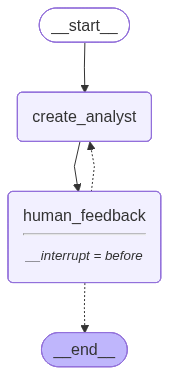

In [51]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [52]:
topic = "The benefits of adopting Langgraph as an agent Framework over Autogen"

In [53]:
max_analysts = 4
thread = {"configurable": {"thread_id": 1}}

In [59]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Role: {analyst.role}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Google
Description: Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph
--------------------------------------------------
Name: Dr. Ava Moreno
Role: Cognitive Scientist
Affiliation: MIT
Description: Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design


--------------------------------------------------
Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and feasibility of integrating Langgraph into existing infrastructure
--------------------------------------------------


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Alex Chen
Role: Startup Founder
Affiliation: TechStars
Description: Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.
--------------------------------------------------
Name: Dr. Rachel Kim
Role: Enterprise Architect
Affiliation: Gartner
Description: Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.
--------------------------------------------------
Name: Mayank Singh
Role: Technical Lead
Affiliation: Microsoft
Description: Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.
--------------------------------------------------
Name: Emily Patel
Role: Innovation Consultant
Affiliation: Accenture
Description: Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.
--

In [55]:
state = graph.get_state(thread)

In [56]:
state

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework over Autogen', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design'), Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and f

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework over Autogen', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design'), Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and feasibility of integrating Langgraph into existing infrastructure')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a7466-1dde-6f5a-8001-345c7c86d7e7'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-12T08:35:17.996937+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a7466-0f3c-66b0-8000-bde660c071ae'}}, tasks=(PregelTask(id='17f88063-513d-dfbe-1c61-5bd69f3f1838', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [57]:
# Check attribute- next
state.next

('human_feedback',)

In [58]:
graph.update_state(thread,
                   {"human_analyst_feedback": "add some start up perspective and focus on latest enterprise application."}, as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a765e-c11e-6d49-8002-8d3c40667c68'}}

In [60]:
# If we are satisfied, then we simply supply no feedback
further_feedback = ""

In [61]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [62]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a773a-218b-6086-8006-b24b9d61eecd'}}

In [63]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next) # should be (END,)

()


In [64]:
analysts = final_state.values.get("analysts")
analysts

[Analyst(name='Alex Chen', role='Startup Founder', affiliation='TechStars', description='Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.'),
 Analyst(name='Dr. Rachel Kim', role='Enterprise Architect', affiliation='Gartner', description='Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.'),
 Analyst(name='Mayank Singh', role='Technical Lead', affiliation='Microsoft', description='Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.'),
 Analyst(name='Emily Patel', role='Innovation Consultant', affiliation='Accenture', description='Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.')]

In [65]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Role: {analyst.role}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: Alex Chen
Role: Startup Founder
Affiliation: TechStars
Description: Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.
--------------------------------------------------
Name: Dr. Rachel Kim
Role: Enterprise Architect
Affiliation: Gartner
Description: Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.
--------------------------------------------------
Name: Mayank Singh
Role: Technical Lead
Affiliation: Microsoft
Description: Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.
--------------------------------------------------
Name: Emily Patel
Role: Innovation Consultant
Affiliation: Accenture
Description: Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.
--

In [18]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

In [67]:
docs = WikipediaLoader(query="The benefits of adopting AWS cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [69]:
from langchain_community.utilities import WikipediaAPIWrapper
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#### Second Workflow

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [3]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [4]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)
tavily_search.invoke("langgraph")

C:\Users\user\AppData\Local\Temp\ipykernel_23960\3682967505.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


[{'title': 'What is LangGraph? - GeeksforGeeks',
  'url': 'https://www.geeksforgeeks.org/machine-learning/what-is-langgraph/',
  'content': 'LangGraph is an open-source framework built by LangChain that streamlines the creation and management of AI agent workflows. At its core, LangGraph combines large language models (LLMs) with graph-based architectures allowing developers to map, organize and optimize how AI agents interact and make decisions.',
  'score': 0.9294982},
 {'title': 'What is LangGraph? - Analytics Vidhya',
  'url': 'https://www.analyticsvidhya.com/blog/2024/07/langgraph-revolutionizing-ai-agent/',
  'content': 'To sum up, LangGraph is a major advancement in the development of AI agents. It enables developers to push the limits of what’s possible with AI agents by eliminating the shortcomings of earlier systems and offering a flexible, graph-based framework for agent construction and execution. LangGraph is positioned to influence the direction of artificial intelligence

In [5]:
from langchain_community.document_loaders import WikipediaLoader


In [6]:
docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:200])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely over


In [81]:
from typing import Annotated, List
import operator
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [ ]:
class InterviewState(MessagesState):
    """ 
    """
    max_num_turn: int
    context: Annotated[list, operator.add]
    analyst: Analyst
    interview: str
    sections: list

class SearchQuery(BaseModel):
    """_summary_
    """
    search_query: str = Field(None, description="Search query for retrieval.")

    

In [34]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":""}

In [35]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.'),
 'interview': '',
 'section': ''}

In [83]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [26]:
print(analyst.persona)

Name: klangat
Role: Gen AI eng.
Affiliation: OpenAI
Description: Focus on building and deploying generative AI models.



In [27]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: klangat\nRole: Gen AI eng.\nAffiliation: OpenAI\nDescription: Focus on building and deploying generative AI models.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

In [100]:
def generate_question(state:InterviewState):
    """Node to generate the questions"""
    # get state
    analyst = state["analyst"]
    messages = state["messages"]

    # generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)] + messages)

    # return the question through state
    return {"messages": [question]}

In [101]:
interview_builder = StateGraph(InterviewState)

In [102]:
from langchain_core.messages import get_buffer_string

In [103]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")


In [ ]:
def ask_question(state:InterviewState):
    """_summary_

    Args:
        state (InterviewState): _description_
    """
    pass

In [104]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web.
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+["messages"])

    # Search
    search_docs = tavily_search.invoke(search_query.search_query)

    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [105]:
def search_wikipedia(state:InterviewState):
    """Retrieve data from wikipedia"""
    
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state["messages"])

    print("*" * 50)
    print(search_query)
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query,
                                  load_max_docs=2).load()
    
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        {
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        }
    )

    return {"context": [formatted_search_docs]}

In [106]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [107]:
def generate_answer(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals = analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)] + messages)

    # Name the message as coming from the expert
    answer.name = "expert"

    # Append it to the state
    return {"messages": [answer]}

In [108]:
def router_message(state:InterviewState, name: str = "expert"):
    """
    Router between question and answer.
    """
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get("max_num_turns", 2)

    # Check the number of expert answers
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # end if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return "save_interview"
    
    # This router is run after each question - answer pair
    # Get the last question ased to check if it is the end of the discussion
    last_question = messages[-2]

    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [109]:
def save_interview(state:InterviewState):
    """
    Save interview
    """
    # Get messages
    messages = state["messages"]

    # Cnvert interview to a string
    interview = get_buffer_string(messages)

    # Save to interviews key
    return {"interview": interview}

In [110]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [111]:
def write_section(state:InterviewState):
    """
    Node to answer a question
    """
    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]

    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus = analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)] +
                          [HumanMessage(content=f"Use this source to write your section: {context}")])
    
    # Append it to state
    return {"sections": [section.content]}

In [112]:
interview_builder.add_node("ask_question", generate_question)
interview_builder.add_node("search_web", search_web)
interview_builder.add_node("search_wikipedia", search_wikipedia)
interview_builder.add_node("generate_answer", generate_answer)
interview_builder.add_node("save_interview", save_interview)
interview_builder.add_node("write_section", write_section)

In [113]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question", "search_web")
interview_builder.add_edge("ask_question", "search_wikipedia")
interview_builder.add_edge("search_web", "generate_answer")
interview_builder.add_edge("search_wikipedia", "generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           router_message,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview", "write_section")
interview_builder.add_edge("write_section", END)

In [114]:
memory = MemorySaver()
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

In [122]:
from IPython.display import display, Markdown, Image

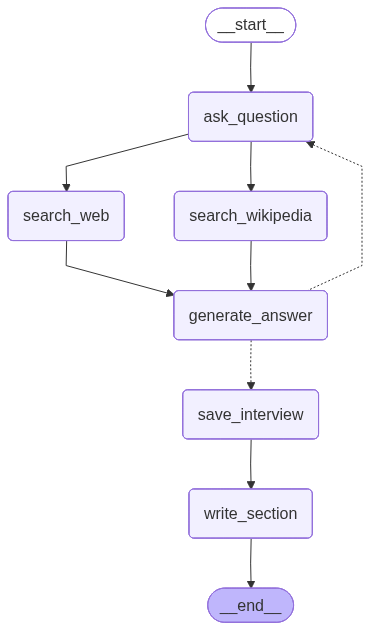

In [116]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [117]:
analyst

Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.')

In [118]:
messages = [HumanMessage("So you said you were writing an article on langgraph?")]

In [119]:
thread = {"configurable": {"thread_id": "1"}}

In [124]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turn": 2}, thread)

ValidationError: 3 validation errors for InterviewState
max_num_turn
  Field required [type=missing, input_value={'context': [], 'analyst'...generative AI models.')}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
interview
  Field required [type=missing, input_value={'context': [], 'analyst'...generative AI models.')}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
sections
  Field required [type=missing, input_value={'context': [], 'analyst'...generative AI models.')}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

In [37]:
state = {"max_num_turns":2, "context":[], "analyst":analyst, "interview":"","section":[],"messages":[HumanMessage(content="Hi do proper search according to the expertise")]}

In [38]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.'),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='Hi do proper search according to the expertise', additional_kwargs={}, response_metadata={})]}

In [44]:
generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'messages': [AIMessage(content="Hello, my name is Rachel Kim, and I'm an analyst focusing on emerging technologies. I'm excited to be speaking with Klangat, a Gen AI engineer at OpenAI, to learn more about building and deploying generative AI models.\n\nKlangat, thanks for taking the time to chat with me today. I'd love to dive right in and explore some of the interesting work you're doing. Can you tell me about a particularly challenging project you've worked on recently, and how you overcame any obstacles that came up during the development and deployment of a generative AI model?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 221, 'total_tokens': 341, 'completion_time': 0.364142907, 'prompt_time': 0.020140994, 'queue_time': 0.085852071, 'total_time': 0.384283901}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e438

In [45]:
result = generate_question(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [46]:
print(result["messages"][0].content)

My name is Rachel Kim, and I'm an analyst focusing on emerging technologies. I'm excited to learn from Klangat, a Gen AI engineer at OpenAI, about the latest developments in building and deploying generative AI models.

Klangat, thanks for taking the time to speak with me today. I'd love to dive right in and explore some of the most interesting and specific aspects of your work. Can you tell me about a particularly innovative project you've worked on recently, perhaps one that showcases a unique application of generative AI? What made it stand out, and what were some of the key challenges you faced during its development?


In [60]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [61]:
result = search_web(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [62]:
result["context"][0]

'<Document href="https://www.merriam-webster.com/dictionary/message"/>\n: a communication in writing, in speech, or by signals\n\n2\n\n: a messenger\'s errand or function\n\n3\n\n: an underlying theme or idea\n\nEtymology\n\nNoun\n\nMiddle English message "job or function of a messenger," from early French message (same meaning), from Latin missaticum "something given to a messenger to deliver," from earlier missus (past participle of mittere "to send, throw") and -aticum "action, result" — related to emit, mission, promise, submissive\n\n## More from Merriam-Webster on message [...] Est. 1828\n\nDictionary Definition\n\n noun\n verb\n noun 2 \n  + noun\n  + verb\n Synonyms\n Example Sentences\n Word History\n Phrases Containing\n Rhymes\n Entries Near\n\n + Cite this EntryCitation\n  + Share\n  + Kids DefinitionKids\n  + More from M-W\n\n   Show more\n Show more \n  + Citation\n  + Share\n  + Kids\n  + More from M-W\n\n + To save this word, you\'ll need to log in.\n\n    Log In\n\n# m

In [63]:
print(result["context"][0])

<Document href="https://www.merriam-webster.com/dictionary/message"/>
: a communication in writing, in speech, or by signals

2

: a messenger's errand or function

3

: an underlying theme or idea

Etymology

Noun

Middle English message "job or function of a messenger," from early French message (same meaning), from Latin missaticum "something given to a messenger to deliver," from earlier missus (past participle of mittere "to send, throw") and -aticum "action, result" — related to emit, mission, promise, submissive

## More from Merriam-Webster on message [...] Est. 1828

Dictionary Definition

 noun
 verb
 noun 2 
  + noun
  + verb
 Synonyms
 Example Sentences
 Word History
 Phrases Containing
 Rhymes
 Entries Near

 + Cite this EntryCitation
  + Share
  + Kids DefinitionKids
  + More from M-W

   Show more
 Show more 
  + Citation
  + Share
  + Kids
  + More from M-W

 + To save this word, you'll need to log in.

    Log In

# message

1 of 2

## noun

mes·​sage  ˈme-sij")

Synon

In [76]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [77]:
result = search_wikipedia(state)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


**************************************************
search_query='What is Langgraph and its significance for business innovation'


In [78]:
print(result["context"])

['']


In [79]:
search_docs = WikipediaLoader(query="Langgraph").load()

In [80]:
search_docs

[Document(metadata={'title': 'LangChain', 'summary': "LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n", 'source': 'https://en.wikipedia.org/wiki/LangChain'}, page_content='LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n== History ==\nLangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startu